best: 65.0
avg: 44.390625
-----------------------
best: 61.0
avg: 44.375
-----------------------
best: 57.5
avg: 42.28125
-----------------------
best: 57.5
avg: 44.4375
-----------------------
best: 61.5
avg: 47.203125
-----------------------
best: 60.5
avg: 44.203125
-----------------------
best: 59.0
avg: 46.359375
-----------------------
best: 58.0
avg: 45.984375
-----------------------
best: 64.5
avg: 44.9375
-----------------------
best: 62.5
avg: 45.84375
-----------------------
[64.5, 65.0, 61.0, 57.5, 57.5, 61.5, 60.5, 59.0, 58.0, 64.5, 62.5]
[46.0, 44.390625, 44.375, 42.28125, 44.4375, 47.203125, 44.203125, 46.359375, 45.984375, 44.9375, 45.84375]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


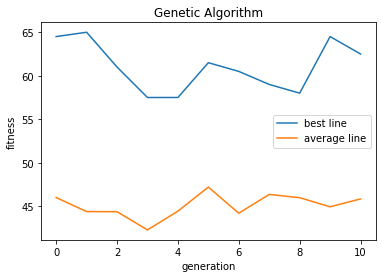

In [4]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(0,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
#     totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
#     return 0.5*totalProtein + 0.5*totalCalories
    return 0.5*totalProtein 
    
def breeding(data, chromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
#         if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
#             if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False
    
    
# def findBestAndAve(chromosome):
#     for i in chromosome:
#         chromosome[i] = fitnessFn(chromosome[i])
#     chromosome.sort(reverse = True)
#     for j in chromosome:
#         crossover(chromosome[j],chromosome[j+1])

# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = 0
    for i in range(0, len(chromosome)):
        temp = int(chromosome[i])*(2**(len(chromosome)-i-1))
        menuNumber += temp
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    return {"sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}

chromosome = []
bestLn = []
avgLn = []
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in range(10):
    breeding(article_read, chromosome, bestLn, avgLn)
    gen = gen + 1
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
print(bestLn)
print(avgLn)
print(genLn)
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 








In [ ]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(28,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
    totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
    return 0.5*totalProtein + 0.5*totalCalories
#     return 0.5*totalProtein 
    
def breeding(data, chromosome, badChromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        while cms.chromosome in badChromosome:
            cms.chromosome = mutate(cms.chromosome)
            print('detect bad chr!')
        while cms.chromosome[0:8] == cms.chromosome[8:16] or cms.chromosome[0:8] == cms.chromosome[16:] or cms.chromosome[8:16] == cms.chromosome[16:] :
            cms.chromosome = mutate(chromosome)
            print('same menu!')
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            if cms.chromosome not in badChromosome:
                badChromosome.append(cms.chromosome) 
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('bad chromosome: ' + str(len(badChromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
        if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
            if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False

def binToDec(binary):
    dec = 0
    for i in range(0, len(binary)):
        temp = int(binary[i])*(2**(len(binary)-i-1))
        dec += temp
    return dec


# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = binToDec(chromosome)
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    name = df.Item_Name[menuNumber]
    return {"name": name, "sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}



chromosome = []
badChromosome = []
bestLn = []
avgLn = []
genNumber = list(range(1))
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
# article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in genNumber:
    breeding(article_read, chromosome, badChromosome, bestLn, avgLn)
    gen = gen + 1
    if 0.05 * bestLn[-1] < abs(bestLn[-1] - avgLn[-1]):
        genNumber.append(i+1)
        print(genNumber[-1])
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 
chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
i = 1
for show in chromosome:
    firstMenu = accessData(article_read, show.chromosome[0:8])['name']
    secondMenu = accessData(article_read, show.chromosome[8:16])['name']
    thirdMenu = accessData(article_read, show.chromosome[16:])['name']
    print('----------- ' + str(i) + ' ------------')
    print(firstMenu)
    print(secondMenu)
    print(thirdMenu)
    print("fitness: " + str(show.fitness))
    i = i + 1






best: 976.0
avg: 871.265625
bad chromosome: 9
-----------------------
1
best: 976.0
avg: 875.21875
bad chromosome: 227
-----------------------
2
best: 976.0
avg: 880.0
bad chromosome: 454
-----------------------
3
best: 976.0
avg: 885.34375
bad chromosome: 607
-----------------------
4
best: 1011.5
avg: 894.3125
bad chromosome: 1117
-----------------------
5
best: 1011.5
avg: 894.53125
bad chromosome: 1170
-----------------------
6
best: 1011.5
avg: 897.5625
bad chromosome: 1269
-----------------------
7
best: 1011.5
avg: 899.140625
bad chromosome: 1602
-----------------------
8
best: 1011.5
avg: 901.078125
bad chromosome: 1718
-----------------------
9
best: 1011.5
avg: 908.09375
bad chromosome: 1773
-----------------------
10
best: 1011.5
avg: 909.96875
bad chromosome: 2057
-----------------------
11
best: 1011.5
avg: 913.296875
bad chromosome: 2141
-----------------------
12
best: 1011.5
avg: 913.296875
bad chromosome: 2416
-----------------------
13
best: 1011.5
avg: 914.390625
bad

best: 1034.5
avg: 960.328125
bad chromosome: 18995
-----------------------
109
best: 1034.5
avg: 964.765625
bad chromosome: 19244
-----------------------
110
best: 1034.5
avg: 966.65625
bad chromosome: 19289
-----------------------
111
best: 1034.5
avg: 968.40625
bad chromosome: 19699
-----------------------
112
best: 1034.5
avg: 963.546875
bad chromosome: 19802
-----------------------
113
best: 1034.5
avg: 962.109375
bad chromosome: 19859
-----------------------
114
best: 1034.5
avg: 967.328125
bad chromosome: 19910
-----------------------
115
best: 1034.5
avg: 963.28125
bad chromosome: 19994
-----------------------
116
best: 1034.5
avg: 962.453125
bad chromosome: 20097
-----------------------
117
best: 1034.5
avg: 966.53125
bad chromosome: 20274
-----------------------
118
best: 1034.5
avg: 965.25
bad chromosome: 20441
-----------------------
119
best: 1034.5
avg: 961.171875
bad chromosome: 20603
-----------------------
120
best: 1034.5
avg: 965.796875
bad chromosome: 20651
---------

best: 1034.5
avg: 972.796875
bad chromosome: 37762
-----------------------
215
best: 1034.5
avg: 968.40625
bad chromosome: 37811
-----------------------
216
best: 1034.5
avg: 970.25
bad chromosome: 37867
-----------------------
217
best: 1034.5
avg: 966.90625
bad chromosome: 37992
-----------------------
218
best: 1034.5
avg: 970.671875
bad chromosome: 38194
-----------------------
219
best: 1034.5
avg: 972.546875
bad chromosome: 38418
-----------------------
220
best: 1069.0
avg: 977.484375
bad chromosome: 39069
-----------------------
221
best: 1069.0
avg: 974.421875
bad chromosome: 39277
-----------------------
222
best: 1069.0
avg: 980.875
bad chromosome: 39301
-----------------------
223
best: 1069.0
avg: 975.859375
bad chromosome: 39686
-----------------------
224
best: 1069.0
avg: 977.640625
bad chromosome: 39766
-----------------------
225
best: 1069.0
avg: 975.796875
bad chromosome: 39941
-----------------------
226
best: 1069.0
avg: 977.890625
bad chromosome: 40350
----------

best: 1069.0
avg: 986.265625
bad chromosome: 57949
-----------------------
320
best: 1069.0
avg: 988.765625
bad chromosome: 58086
-----------------------
321
best: 1069.0
avg: 989.828125
bad chromosome: 58374
-----------------------
322
best: 1069.0
avg: 989.140625
bad chromosome: 58455
-----------------------
323
best: 1069.0
avg: 985.4375
bad chromosome: 58505
-----------------------
324
best: 1069.0
avg: 988.78125
bad chromosome: 58784
-----------------------
325
best: 1069.0
avg: 990.546875
bad chromosome: 58933
-----------------------
326
best: 1069.0
avg: 987.265625
bad chromosome: 59072
-----------------------
327
best: 1069.0
avg: 986.1875
bad chromosome: 59316
-----------------------
328
best: 1069.0
avg: 985.125
bad chromosome: 59600
-----------------------
329
best: 1069.0
avg: 986.8125
bad chromosome: 59714
-----------------------
330
best: 1069.0
avg: 987.171875
bad chromosome: 59931
-----------------------
331
best: 1069.0
avg: 990.625
bad chromosome: 60224
--------------

best: 1091.0
avg: 994.9375
bad chromosome: 78859
-----------------------
425
best: 1091.0
avg: 991.9375
bad chromosome: 78883
-----------------------
426
best: 1091.0
avg: 992.515625
bad chromosome: 78944
-----------------------
427
best: 1091.0
avg: 999.21875
bad chromosome: 79064
-----------------------
428
best: 1091.0
avg: 994.6875
bad chromosome: 79414
-----------------------
429
best: 1091.0
avg: 992.328125
bad chromosome: 79499
-----------------------
430
best: 1091.0
avg: 996.640625
bad chromosome: 79680
-----------------------
431
best: 1091.0
avg: 990.796875
bad chromosome: 79952
-----------------------
432
best: 1091.0
avg: 988.828125
bad chromosome: 80097
-----------------------
433
best: 1091.0
avg: 995.78125
bad chromosome: 80909
-----------------------
434
best: 1091.0
avg: 992.734375
bad chromosome: 81126
-----------------------
435
best: 1091.0
avg: 989.71875
bad chromosome: 81380
-----------------------
436
best: 1091.0
avg: 1000.0625
bad chromosome: 81483
-----------

best: 1091.0
avg: 1003.1875
bad chromosome: 98858
-----------------------
530
best: 1091.0
avg: 999.5625
bad chromosome: 99027
-----------------------
531
best: 1091.0
avg: 997.140625
bad chromosome: 99167
-----------------------
532
best: 1091.0
avg: 998.421875
bad chromosome: 99488
-----------------------
533
best: 1091.0
avg: 1004.625
bad chromosome: 99643
-----------------------
534
best: 1091.0
avg: 1000.34375
bad chromosome: 99741
-----------------------
535
best: 1091.0
avg: 1000.34375
bad chromosome: 99909
-----------------------
536
best: 1091.0
avg: 999.015625
bad chromosome: 100098
-----------------------
537
best: 1091.0
avg: 1000.828125
bad chromosome: 100163
-----------------------
538
best: 1091.0
avg: 1001.125
bad chromosome: 100364
-----------------------
539
best: 1091.0
avg: 1001.46875
bad chromosome: 100468
-----------------------
540
best: 1091.0
avg: 998.140625
bad chromosome: 100614
-----------------------
541
best: 1091.0
avg: 998.28125
bad chromosome: 100748
--

best: 1091.0
avg: 1000.140625
bad chromosome: 116221
-----------------------
633
best: 1091.0
avg: 1002.1875
bad chromosome: 116248
-----------------------
634
best: 1091.0
avg: 997.828125
bad chromosome: 116309
-----------------------
635
best: 1091.0
avg: 998.15625
bad chromosome: 116417
-----------------------
636
best: 1091.0
avg: 1003.375
bad chromosome: 116583
-----------------------
637
best: 1091.0
avg: 1003.328125
bad chromosome: 116862
-----------------------
638
best: 1091.0
avg: 1000.0625
bad chromosome: 116903
-----------------------
639
best: 1091.0
avg: 997.703125
bad chromosome: 116951
-----------------------
640
best: 1091.0
avg: 1004.15625
bad chromosome: 117052
-----------------------
641
best: 1091.0
avg: 1003.6875
bad chromosome: 117106
-----------------------
642
detect bad chr!
best: 1091.0
avg: 999.84375
bad chromosome: 117302
-----------------------
643
best: 1091.0
avg: 1006.609375
bad chromosome: 117628
-----------------------
644
best: 1091.0
avg: 1005.01562

best: 1107.0
avg: 1004.84375
bad chromosome: 136374
-----------------------
736
best: 1107.0
avg: 1007.015625
bad chromosome: 136445
-----------------------
737
best: 1107.0
avg: 1011.953125
bad chromosome: 136617
-----------------------
738
best: 1107.0
avg: 1011.265625
bad chromosome: 136719
-----------------------
739
best: 1107.0
avg: 1009.359375
bad chromosome: 136768
-----------------------
740
best: 1107.0
avg: 1010.984375
bad chromosome: 137278
-----------------------
741
best: 1107.0
avg: 1007.71875
bad chromosome: 137473
-----------------------
742
best: 1107.0
avg: 1010.40625
bad chromosome: 137591
-----------------------
743
best: 1107.0
avg: 1010.75
bad chromosome: 137774
-----------------------
744
best: 1107.0
avg: 1010.171875
bad chromosome: 137824
-----------------------
745
best: 1107.0
avg: 1012.21875
bad chromosome: 138030
-----------------------
746
best: 1107.0
avg: 1010.15625
bad chromosome: 138185
-----------------------
747
best: 1107.0
avg: 1014.484375
bad chr

best: 1107.0
avg: 1013.109375
bad chromosome: 155261
-----------------------
839
best: 1107.0
avg: 1010.546875
bad chromosome: 155429
-----------------------
840
best: 1107.0
avg: 1014.78125
bad chromosome: 155751
-----------------------
841
best: 1107.0
avg: 1013.109375
bad chromosome: 155874
-----------------------
842
best: 1107.0
avg: 1011.53125
bad chromosome: 156076
-----------------------
843
best: 1107.0
avg: 1013.6875
bad chromosome: 156530
-----------------------
844
best: 1107.0
avg: 1013.140625
bad chromosome: 157011
-----------------------
845
best: 1107.0
avg: 1015.0
bad chromosome: 157329
-----------------------
846
best: 1107.0
avg: 1016.75
bad chromosome: 157677
-----------------------
847
best: 1107.0
avg: 1022.453125
bad chromosome: 157917
-----------------------
848
best: 1107.0
avg: 1016.65625
bad chromosome: 157995
-----------------------
849
detect bad chr!
detect bad chr!
best: 1107.0
avg: 1014.015625
bad chromosome: 158217
-----------------------
850
best: 1107

best: 1107.0
avg: 1019.296875
bad chromosome: 174290
-----------------------
940
best: 1107.0
avg: 1019.65625
bad chromosome: 174520
-----------------------
941
best: 1107.0
avg: 1015.03125
bad chromosome: 174622
-----------------------
942
best: 1107.0
avg: 1013.78125
bad chromosome: 175007
-----------------------
943
best: 1107.0
avg: 1015.84375
bad chromosome: 175240
-----------------------
944
best: 1107.0
avg: 1014.203125
bad chromosome: 175369
-----------------------
945
best: 1107.0
avg: 1017.28125
bad chromosome: 175503
-----------------------
946
best: 1107.0
avg: 1019.328125
bad chromosome: 175705
-----------------------
947
best: 1107.0
avg: 1015.984375
bad chromosome: 175846
-----------------------
948
best: 1107.0
avg: 1020.625
bad chromosome: 176042
-----------------------
949
best: 1107.0
avg: 1019.828125
bad chromosome: 176563
-----------------------
950
best: 1107.0
avg: 1017.859375
bad chromosome: 176616
-----------------------
951
best: 1107.0
avg: 1017.6875
bad chro

best: 1107.0
avg: 1021.421875
bad chromosome: 192856
-----------------------
1041
best: 1107.0
avg: 1020.96875
bad chromosome: 193019
-----------------------
1042
best: 1107.0
avg: 1019.015625
bad chromosome: 193181
-----------------------
1043
best: 1107.0
avg: 1018.5
bad chromosome: 193281
-----------------------
1044
best: 1107.0
avg: 1018.515625
bad chromosome: 193346
-----------------------
1045
best: 1107.0
avg: 1020.390625
bad chromosome: 193492
-----------------------
1046
best: 1107.0
avg: 1020.0625
bad chromosome: 193662
-----------------------
1047
best: 1107.0
avg: 1016.21875
bad chromosome: 193725
-----------------------
1048
best: 1107.0
avg: 1019.296875
bad chromosome: 193791
-----------------------
1049
best: 1107.0
avg: 1015.796875
bad chromosome: 193927
-----------------------
1050
best: 1107.0
avg: 1019.671875
bad chromosome: 194468
-----------------------
1051
best: 1107.0
avg: 1018.4375
bad chromosome: 194606
-----------------------
1052
best: 1107.0
avg: 1017.5
ba

best: 1107.0
avg: 1020.21875
bad chromosome: 210613
-----------------------
1141
best: 1107.0
avg: 1022.640625
bad chromosome: 210790
-----------------------
1142
best: 1107.0
avg: 1021.40625
bad chromosome: 211177
-----------------------
1143
best: 1107.0
avg: 1025.59375
bad chromosome: 211203
-----------------------
1144
best: 1107.0
avg: 1022.078125
bad chromosome: 211295
-----------------------
1145
best: 1107.0
avg: 1028.65625
bad chromosome: 211357
-----------------------
1146
best: 1107.0
avg: 1024.875
bad chromosome: 211398
-----------------------
1147
best: 1107.0
avg: 1026.828125
bad chromosome: 211582
-----------------------
1148
best: 1107.0
avg: 1023.0
bad chromosome: 211803
-----------------------
1149
best: 1107.0
avg: 1025.546875
bad chromosome: 211809
-----------------------
1150
best: 1107.0
avg: 1027.546875
bad chromosome: 211896
-----------------------
1151
best: 1107.0
avg: 1025.515625
bad chromosome: 212092
-----------------------
1152
best: 1107.0
avg: 1024.60937

best: 1107.0
avg: 1027.078125
bad chromosome: 228608
-----------------------
1241
best: 1107.0
avg: 1032.6875
bad chromosome: 228654
-----------------------
1242
best: 1107.0
avg: 1027.765625
bad chromosome: 228874
-----------------------
1243
best: 1107.0
avg: 1028.65625
bad chromosome: 229033
-----------------------
1244
best: 1107.0
avg: 1026.53125
bad chromosome: 229335
-----------------------
1245
best: 1107.0
avg: 1027.375
bad chromosome: 229464
-----------------------
1246
best: 1107.0
avg: 1031.8125
bad chromosome: 229529
-----------------------
1247
best: 1107.0
avg: 1033.421875
bad chromosome: 229650
-----------------------
1248
best: 1107.0
avg: 1029.734375
bad chromosome: 230061
-----------------------
1249
best: 1107.0
avg: 1027.625
bad chromosome: 230216
-----------------------
1250
best: 1107.0
avg: 1036.765625
bad chromosome: 230463
-----------------------
1251
best: 1107.0
avg: 1028.984375
bad chromosome: 230533
-----------------------
1252
best: 1107.0
avg: 1028.0625


best: 1107.0
avg: 1035.5625
bad chromosome: 246979
-----------------------
1342
best: 1107.0
avg: 1034.84375
bad chromosome: 247118
-----------------------
1343
best: 1107.0
avg: 1031.53125
bad chromosome: 247316
-----------------------
1344
best: 1107.0
avg: 1032.34375
bad chromosome: 247484
-----------------------
1345
best: 1107.0
avg: 1033.0
bad chromosome: 247527
-----------------------
1346
best: 1107.0
avg: 1031.90625
bad chromosome: 247586
-----------------------
1347
best: 1107.0
avg: 1031.390625
bad chromosome: 247732
-----------------------
1348
detect bad chr!
best: 1107.0
avg: 1029.53125
bad chromosome: 247851
-----------------------
1349
best: 1107.0
avg: 1031.359375
bad chromosome: 248331
-----------------------
1350
best: 1107.0
avg: 1029.21875
bad chromosome: 248408
-----------------------
1351
best: 1107.0
avg: 1030.59375
bad chromosome: 248481
-----------------------
1352
best: 1107.0
avg: 1031.046875
bad chromosome: 248707
-----------------------
1353
best: 1107.0
a

best: 1107.0
avg: 1028.765625
bad chromosome: 265169
-----------------------
1443
best: 1107.0
avg: 1029.25
bad chromosome: 265221
-----------------------
1444
best: 1107.0
avg: 1028.96875
bad chromosome: 265283
-----------------------
1445
best: 1107.0
avg: 1030.1875
bad chromosome: 265417
-----------------------
1446
best: 1107.0
avg: 1028.0625
bad chromosome: 265856
-----------------------
1447
best: 1107.0
avg: 1029.703125
bad chromosome: 266052
-----------------------
1448
best: 1107.0
avg: 1031.703125
bad chromosome: 266338
-----------------------
1449
best: 1107.0
avg: 1032.265625
bad chromosome: 266439
-----------------------
1450
best: 1107.0
avg: 1032.421875
bad chromosome: 266455
-----------------------
1451
best: 1107.0
avg: 1033.078125
bad chromosome: 266740
-----------------------
1452
best: 1107.0
avg: 1032.265625
bad chromosome: 266875
-----------------------
1453
best: 1107.0
avg: 1032.875
bad chromosome: 267329
-----------------------
1454
best: 1107.0
avg: 1032.0
bad

best: 1107.0
avg: 1035.125
bad chromosome: 285286
-----------------------
1543
detect bad chr!
best: 1107.0
avg: 1034.796875
bad chromosome: 285314
-----------------------
1544
best: 1107.0
avg: 1034.359375
bad chromosome: 285516
-----------------------
1545
best: 1107.0
avg: 1034.21875
bad chromosome: 285796
-----------------------
1546
detect bad chr!
best: 1107.0
avg: 1033.28125
bad chromosome: 286188
-----------------------
1547
best: 1107.0
avg: 1030.015625
bad chromosome: 286239
-----------------------
1548
best: 1107.0
avg: 1032.25
bad chromosome: 286412
-----------------------
1549
best: 1107.0
avg: 1033.640625
bad chromosome: 286696
-----------------------
1550
best: 1107.0
avg: 1033.796875
bad chromosome: 286907
-----------------------
1551
best: 1107.0
avg: 1034.234375
bad chromosome: 287141
-----------------------
1552
best: 1107.0
avg: 1032.546875
bad chromosome: 287159
-----------------------
1553
best: 1107.0
avg: 1032.84375
bad chromosome: 287358
-----------------------

best: 1107.0
avg: 1032.171875
bad chromosome: 302846
-----------------------
1643
best: 1107.0
avg: 1032.421875
bad chromosome: 303067
-----------------------
1644
best: 1107.0
avg: 1037.375
bad chromosome: 303181
-----------------------
1645
best: 1107.0
avg: 1035.484375
bad chromosome: 303418
-----------------------
1646
best: 1107.0
avg: 1037.109375
bad chromosome: 303465
-----------------------
1647
best: 1107.0
avg: 1033.53125
bad chromosome: 303527
-----------------------
1648
best: 1107.0
avg: 1033.515625
bad chromosome: 303821
-----------------------
1649
best: 1107.0
avg: 1032.546875
bad chromosome: 303981
-----------------------
1650
best: 1107.0
avg: 1035.328125
bad chromosome: 304015
-----------------------
1651
best: 1107.0
avg: 1035.34375
bad chromosome: 304117
-----------------------
1652
best: 1107.0
avg: 1034.671875
bad chromosome: 304324
-----------------------
1653
best: 1107.0
avg: 1030.703125
bad chromosome: 304629
-----------------------
1654
best: 1107.0
avg: 103

best: 1107.0
avg: 1034.390625
bad chromosome: 321213
-----------------------
1743
detect bad chr!
best: 1107.0
avg: 1033.140625
bad chromosome: 321369
-----------------------
1744
best: 1107.0
avg: 1032.875
bad chromosome: 321476
-----------------------
1745
detect bad chr!
best: 1107.0
avg: 1033.921875
bad chromosome: 321552
-----------------------
1746
best: 1107.0
avg: 1032.53125
bad chromosome: 321768
-----------------------
1747
best: 1107.0
avg: 1031.59375
bad chromosome: 321848
-----------------------
1748
best: 1107.0
avg: 1032.828125
bad chromosome: 321945
-----------------------
1749
detect bad chr!
best: 1107.0
avg: 1030.109375
bad chromosome: 322077
-----------------------
1750
best: 1107.0
avg: 1035.1875
bad chromosome: 322190
-----------------------
1751
best: 1107.0
avg: 1039.09375
bad chromosome: 322323
-----------------------
1752
best: 1107.0
avg: 1034.59375
bad chromosome: 322680
-----------------------
1753
best: 1107.0
avg: 1037.6875
bad chromosome: 322707
--------

best: 1107.0
avg: 1034.734375
bad chromosome: 336934
-----------------------
1842
best: 1107.0
avg: 1034.578125
bad chromosome: 336947
-----------------------
1843
best: 1107.0
avg: 1035.3125
bad chromosome: 337026
-----------------------
1844
best: 1107.0
avg: 1036.578125
bad chromosome: 337060
-----------------------
1845
best: 1107.0
avg: 1034.609375
bad chromosome: 337192
-----------------------
1846
best: 1107.0
avg: 1032.453125
bad chromosome: 337303
-----------------------
1847
best: 1107.0
avg: 1030.90625
bad chromosome: 337397
-----------------------
1848
best: 1107.0
avg: 1033.046875
bad chromosome: 337505
-----------------------
1849
best: 1107.0
avg: 1030.359375
bad chromosome: 337562
-----------------------
1850
best: 1107.0
avg: 1033.0
bad chromosome: 337760
-----------------------
1851
best: 1107.0
avg: 1034.328125
bad chromosome: 337860
-----------------------
1852
best: 1107.0
avg: 1033.859375
bad chromosome: 338320
-----------------------
1853
best: 1107.0
avg: 1035.3

best: 1107.0
avg: 1033.078125
bad chromosome: 353228
-----------------------
1942
best: 1107.0
avg: 1034.796875
bad chromosome: 353344
-----------------------
1943
best: 1107.0
avg: 1031.125
bad chromosome: 353495
-----------------------
1944
detect bad chr!
best: 1107.0
avg: 1030.34375
bad chromosome: 353524
-----------------------
1945
detect bad chr!
best: 1107.0
avg: 1034.5625
bad chromosome: 353627
-----------------------
1946
best: 1107.0
avg: 1037.609375
bad chromosome: 353791
-----------------------
1947
detect bad chr!
best: 1107.0
avg: 1032.078125
bad chromosome: 353993
-----------------------
1948
best: 1107.0
avg: 1034.484375
bad chromosome: 354143
-----------------------
1949
best: 1107.0
avg: 1031.5
bad chromosome: 354224
-----------------------
1950
best: 1107.0
avg: 1031.921875
bad chromosome: 354371
-----------------------
1951
best: 1107.0
avg: 1033.1875
bad chromosome: 354657
-----------------------
1952
best: 1107.0
avg: 1029.65625
bad chromosome: 354662
-----------

best: 1107.0
avg: 1032.1875
bad chromosome: 369858
-----------------------
2042
detect bad chr!
best: 1107.0
avg: 1032.34375
bad chromosome: 369980
-----------------------
2043
best: 1107.0
avg: 1034.453125
bad chromosome: 370133
-----------------------
2044
best: 1107.0
avg: 1030.796875
bad chromosome: 370218
-----------------------
2045
best: 1107.0
avg: 1033.28125
bad chromosome: 370253
-----------------------
2046
detect bad chr!
best: 1107.0
avg: 1036.671875
bad chromosome: 370398
-----------------------
2047
best: 1107.0
avg: 1034.0
bad chromosome: 370447
-----------------------
2048
best: 1107.0
avg: 1039.734375
bad chromosome: 371024
-----------------------
2049
best: 1107.0
avg: 1034.828125
bad chromosome: 371220
-----------------------
2050
best: 1107.0
avg: 1037.0625
bad chromosome: 371296
-----------------------
2051
best: 1107.0
avg: 1033.125
bad chromosome: 371650
-----------------------
2052
best: 1107.0
avg: 1035.140625
bad chromosome: 372040
-----------------------
205

best: 1107.0
avg: 1034.34375
bad chromosome: 388048
-----------------------
2141
best: 1107.0
avg: 1031.328125
bad chromosome: 388562
-----------------------
2142
best: 1107.0
avg: 1035.109375
bad chromosome: 388653
-----------------------
2143
best: 1107.0
avg: 1033.359375
bad chromosome: 388699
-----------------------
2144
best: 1107.0
avg: 1037.28125
bad chromosome: 388749
-----------------------
2145
best: 1107.0
avg: 1035.34375
bad chromosome: 388845
-----------------------
2146
best: 1107.0
avg: 1033.984375
bad chromosome: 389065
-----------------------
2147
best: 1107.0
avg: 1033.421875
bad chromosome: 389179
-----------------------
2148
best: 1107.0
avg: 1035.953125
bad chromosome: 389352
-----------------------
2149
best: 1107.0
avg: 1035.0625
bad chromosome: 389700
-----------------------
2150
best: 1107.0
avg: 1034.578125
bad chromosome: 389854
-----------------------
2151
best: 1107.0
avg: 1033.859375
bad chromosome: 389949
-----------------------
2152
best: 1107.0
avg: 103

best: 1107.0
avg: 1037.96875
bad chromosome: 404897
-----------------------
2241
best: 1107.0
avg: 1038.125
bad chromosome: 405078
-----------------------
2242
best: 1107.0
avg: 1035.828125
bad chromosome: 405332
-----------------------
2243
best: 1107.0
avg: 1039.125
bad chromosome: 405396
-----------------------
2244
best: 1107.0
avg: 1037.390625
bad chromosome: 405603
-----------------------
2245
detect bad chr!
best: 1107.0
avg: 1034.296875
bad chromosome: 405819
-----------------------
2246
best: 1107.0
avg: 1031.625
bad chromosome: 406079
-----------------------
2247
best: 1107.0
avg: 1038.1875
bad chromosome: 406110
-----------------------
2248
best: 1107.0
avg: 1036.953125
bad chromosome: 406250
-----------------------
2249
best: 1107.0
avg: 1036.734375
bad chromosome: 406339
-----------------------
2250
best: 1107.0
avg: 1036.203125
bad chromosome: 406392
-----------------------
2251
best: 1107.0
avg: 1039.109375
bad chromosome: 406648
-----------------------
2252
best: 1107.0

best: 1107.0
avg: 1034.953125
bad chromosome: 422759
-----------------------
2338
best: 1107.0
avg: 1034.359375
bad chromosome: 422891
-----------------------
2339
best: 1107.0
avg: 1036.25
bad chromosome: 423269
-----------------------
2340
best: 1107.0
avg: 1038.859375
bad chromosome: 423290
-----------------------
2341
best: 1107.0
avg: 1037.484375
bad chromosome: 423445
-----------------------
2342
best: 1107.0
avg: 1037.46875
bad chromosome: 423505
-----------------------
2343
best: 1107.0
avg: 1031.25
bad chromosome: 423544
-----------------------
2344
best: 1107.0
avg: 1034.8125
bad chromosome: 423649
-----------------------
2345
best: 1107.0
avg: 1035.6875
bad chromosome: 423743
-----------------------
2346
best: 1107.0
avg: 1034.875
bad chromosome: 423781
-----------------------
2347
best: 1107.0
avg: 1034.046875
bad chromosome: 423805
-----------------------
2348
best: 1107.0
avg: 1033.015625
bad chromosome: 423955
-----------------------
2349
best: 1107.0
avg: 1031.734375
ba

best: 1107.0
avg: 1034.609375
bad chromosome: 440820
-----------------------
2436
best: 1107.0
avg: 1033.390625
bad chromosome: 441021
-----------------------
2437
best: 1107.0
avg: 1035.953125
bad chromosome: 441146
-----------------------
2438
best: 1107.0
avg: 1038.71875
bad chromosome: 441383
-----------------------
2439
best: 1107.0
avg: 1036.953125
bad chromosome: 441487
-----------------------
2440
best: 1107.0
avg: 1036.671875
bad chromosome: 441578
-----------------------
2441
best: 1107.0
avg: 1033.359375
bad chromosome: 441663
-----------------------
2442
best: 1107.0
avg: 1034.59375
bad chromosome: 441899
-----------------------
2443
best: 1107.0
avg: 1039.09375
bad chromosome: 442085
-----------------------
2444
best: 1107.0
avg: 1037.65625
bad chromosome: 442140
-----------------------
2445
best: 1107.0
avg: 1039.234375
bad chromosome: 442340
-----------------------
2446
best: 1107.0
avg: 1037.109375
bad chromosome: 442615
-----------------------
2447
best: 1107.0
avg: 10

best: 1107.0
avg: 1033.921875
bad chromosome: 459193
-----------------------
2535
best: 1107.0
avg: 1033.15625
bad chromosome: 459225
-----------------------
2536
best: 1107.0
avg: 1035.46875
bad chromosome: 459315
-----------------------
2537
detect bad chr!
best: 1107.0
avg: 1032.765625
bad chromosome: 459447
-----------------------
2538
best: 1107.0
avg: 1033.234375
bad chromosome: 459672
-----------------------
2539
best: 1107.0
avg: 1036.84375
bad chromosome: 459837
-----------------------
2540
best: 1107.0
avg: 1033.6875
bad chromosome: 460119
-----------------------
2541
best: 1107.0
avg: 1032.75
bad chromosome: 460245
-----------------------
2542
best: 1107.0
avg: 1038.140625
bad chromosome: 460353
-----------------------
2543
best: 1107.0
avg: 1034.4375
bad chromosome: 460403
-----------------------
2544
detect bad chr!
best: 1107.0
avg: 1032.890625
bad chromosome: 460470
-----------------------
2545
best: 1107.0
avg: 1041.28125
bad chromosome: 460724
-----------------------
2

In [35]:
if 'a' not in ['b','c']:
    print('a')

a
